## Clustering Task 2

##  Prepare Problem

In [1]:
# Load libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting


In [2]:
# sklearn package for machine learning in python:
from pandas import set_option

In [3]:
# Load dataset
country_data = pd.read_csv('country_data.csv')

## Summarize Data

In [4]:
# display dataset in rows and columns
display(country_data.head())

# display number of rows and columns
country_data.shape

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


(167, 10)

In [5]:
# list the column names
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Descriptive statistics

In [6]:
# descriptions
set_option('precision', 2)
print(country_data.describe())

       child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89   17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21   19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07     609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20    3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30    9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75   22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00  125000.00     104.00       82.80   

       total_fer       gdpp  
count     167.00     167.00  
mean        2.95   12964.16  
std         1.51   18328.70  
min         1.15     231.00  
25%         1.79    1330.00  
50%         2.41    4660.00  
75%         3.88   14050.00  
max         7.49  105000.00  


## Data Analysis

In [7]:
# correlation
set_option('precision', 3)
print(country_data.corr(method='pearson'))

# Considering attributes that are strongly correlated to price
# using income as the basis and considering values that are strongly correlated to it
# Using values with positive values for clustering
# the attributes to be considred are:
# exports,  health , imports,  income, life_expec, gdpp  

            child_mort  exports  health  imports  income  inflation  \
child_mort       1.000   -0.318  -0.200   -0.127  -0.524      0.288   
exports         -0.318    1.000  -0.114    0.737   0.517     -0.107   
health          -0.200   -0.114   1.000    0.096   0.130     -0.255   
imports         -0.127    0.737   0.096    1.000   0.122     -0.247   
income          -0.524    0.517   0.130    0.122   1.000     -0.148   
inflation        0.288   -0.107  -0.255   -0.247  -0.148      1.000   
life_expec      -0.887    0.316   0.211    0.054   0.612     -0.240   
total_fer        0.848   -0.320  -0.197   -0.159  -0.502      0.317   
gdpp            -0.483    0.419   0.346    0.115   0.896     -0.222   

            life_expec  total_fer   gdpp  
child_mort      -0.887      0.848 -0.483  
exports          0.316     -0.320  0.419  
health           0.211     -0.197  0.346  
imports          0.054     -0.159  0.115  
income           0.612     -0.502  0.896  
inflation       -0.240      0.3

In [8]:
country_data_df = country_data.drop(['child_mort', 'inflation', 'total_fer','country'],axis=1)

In [9]:
country_data_df.head()

,exports,health,imports,income,life_expec,gdpp
0,10.0,7.58,44.9,1610,56.2,553
1,28.0,6.55,48.6,9930,76.3,4090
2,38.4,4.17,31.4,12900,76.5,4460
3,62.3,2.85,42.9,5900,60.1,3530
4,45.5,6.03,58.9,19100,76.8,12200


## MeanShift Algorithm

In [10]:
# give the 6 columns to X
X= country_data_df.values[:,0:6]

In [11]:
# sklearn package for machine learning in python:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [12]:
from sklearn.cluster import  estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

In [13]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print(n_clusters_)

[[3.31262039e+01 6.32611650e+00 4.60744262e+01 5.91905825e+03
  6.62563107e+01 2.75343689e+03]
 [4.26533333e+01 1.07240000e+01 3.99000000e+01 4.09333333e+04
  8.08933333e+01 4.53200000e+04]
 [5.56000000e+01 8.35153846e+00 5.53615385e+01 2.93615385e+04
  7.78384615e+01 2.48692308e+04]
 [6.76500000e+01 4.12750000e+00 4.60000000e+01 4.13750000e+04
  7.20250000e+01 1.91000000e+04]
 [1.11366667e+02 3.14333333e+00 7.74666667e+01 7.59666667e+04
  7.93333333e+01 4.01333333e+04]
 [1.75000000e+02 7.77000000e+00 1.42000000e+02 9.17000000e+04
  8.13000000e+01 1.05000000e+05]
 [7.77000000e+01 3.66000000e+00 6.36000000e+01 5.76000000e+04
  7.65000000e+01 3.50000000e+04]
 [6.40000000e+01 1.15000000e+01 5.33000000e+01 5.55000000e+04
  8.22000000e+01 7.46000000e+04]
 [6.23000000e+01 1.81000000e+00 2.38000000e+01 1.25000000e+05
  7.95000000e+01 7.03000000e+04]
 [3.97000000e+01 9.48000000e+00 2.85000000e+01 6.23000000e+04
  8.10000000e+01 8.78000000e+04]]
10


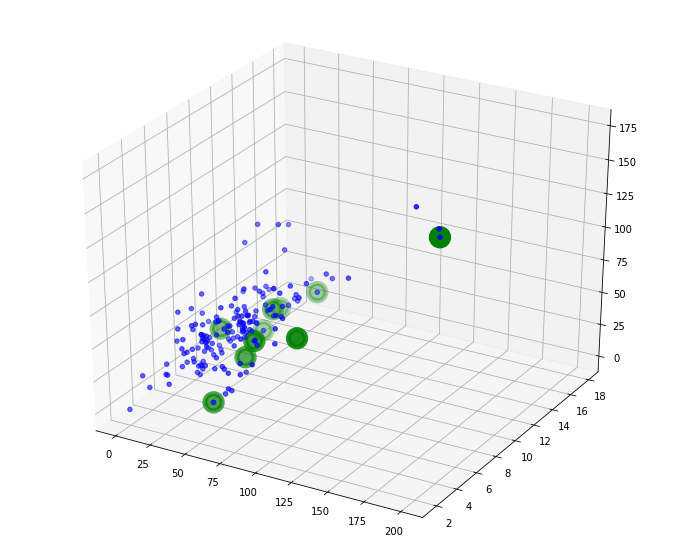

In [14]:
msc_fig = plt.figure(figsize=(12, 10))

ax = msc_fig.add_subplot(111, projection ='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o',color ='blue')

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='o', color ='green',
          s = 300, linewidth = 5, zorder = 10)
 
plt.show()

## Inclusion of many features

In [15]:
country_data= country_data.drop(['country'],axis=1)

In [16]:
# give the 9 columns to X
X_new= country_data_df.values[:,0:9]

In [17]:
# apply the Meanshift Algorithm
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_new)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print(n_clusters_)

[[3.31262039e+01 6.32611650e+00 4.60744262e+01 5.91905825e+03
  6.62563107e+01 2.75343689e+03]
 [4.26533333e+01 1.07240000e+01 3.99000000e+01 4.09333333e+04
  8.08933333e+01 4.53200000e+04]
 [5.56000000e+01 8.35153846e+00 5.53615385e+01 2.93615385e+04
  7.78384615e+01 2.48692308e+04]
 [6.76500000e+01 4.12750000e+00 4.60000000e+01 4.13750000e+04
  7.20250000e+01 1.91000000e+04]
 [1.11366667e+02 3.14333333e+00 7.74666667e+01 7.59666667e+04
  7.93333333e+01 4.01333333e+04]
 [1.75000000e+02 7.77000000e+00 1.42000000e+02 9.17000000e+04
  8.13000000e+01 1.05000000e+05]
 [7.77000000e+01 3.66000000e+00 6.36000000e+01 5.76000000e+04
  7.65000000e+01 3.50000000e+04]
 [6.40000000e+01 1.15000000e+01 5.33000000e+01 5.55000000e+04
  8.22000000e+01 7.46000000e+04]
 [6.23000000e+01 1.81000000e+00 2.38000000e+01 1.25000000e+05
  7.95000000e+01 7.03000000e+04]
 [3.97000000e+01 9.48000000e+00 2.85000000e+01 6.23000000e+04
  8.10000000e+01 8.78000000e+04]]
10


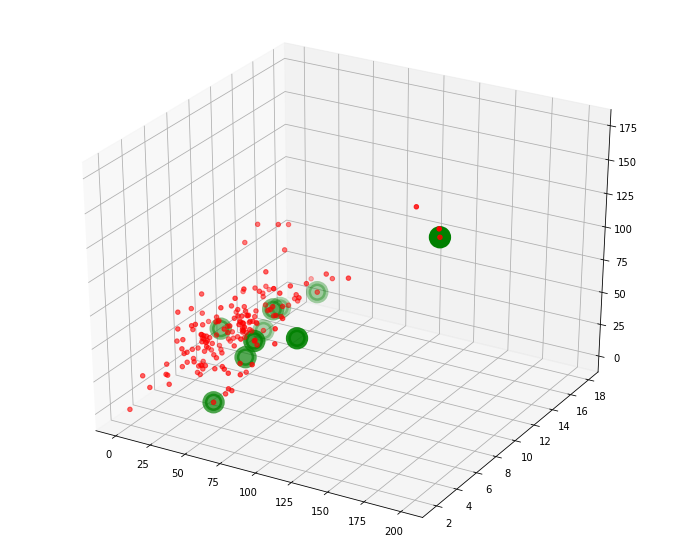

In [18]:
# plot the figure for the datasets clustering
msc_fig2 = plt.figure(figsize=(12, 10))

ax = msc_fig2.add_subplot(111, projection ='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o',color ='red')

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='o', color ='green',
          s = 300, linewidth = 5, zorder = 10)
 
plt.show()